In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [83]:
dados[dados.Receita < dados.Despesa]

,Mes,Despesa,Receita
17,1998-06-01,44564.967610,44415.299775
59,2001-12-01,84908.239547,82536.958135
83,2003-12-01,89243.072657,86298.844848
212,2014-09-01,129370.691748,119788.278626
226,2015-11-01,113065.104095,108021.112359
227,2015-12-01,198382.727477,150990.528573
229,2016-02-01,105676.955761,101960.203235
234,2016-07-01,123008.889620,119510.896805
235,2016-08-01,105134.894491,100711.375995
236,2016-09-01,116816.994235,103209.682626


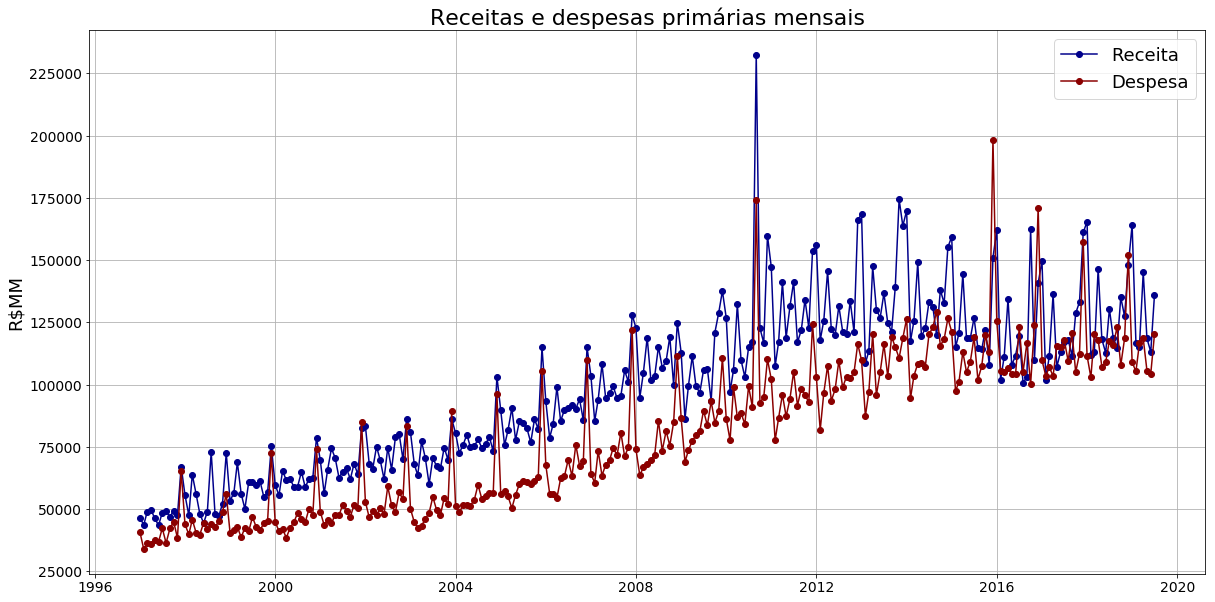

In [121]:
# Lendo os dados mensais
dados = pd.read_csv('resultado_primario.csv', decimal = ',', parse_dates = ['Mes'], date_parser = lambda s : [pd.datetime.strptime(x, '%m/%y') for x in s])

fig = plt.figure(figsize = (20, 10))

plt.plot(dados.Mes, dados.Receita, 'o-', label = 'Receita', color = 'darkblue')
plt.plot(dados.Mes, dados.Despesa, 'o-', label = 'Despesa', color = 'darkred')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Receitas e despesas primárias mensais', fontsize = 22)
plt.grid(True)

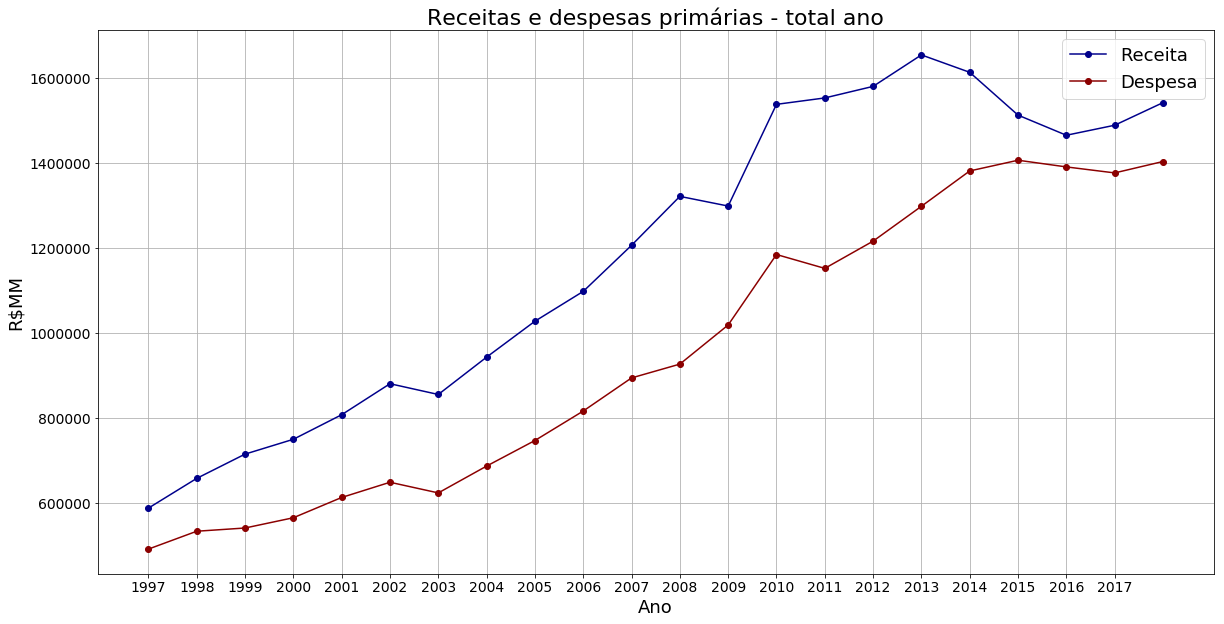

In [119]:
# Agrupando por ano
dados_ano = dados.groupby(dados.Mes.dt.year).sum().reset_index()
dados_ano = dados_ano[dados_ano.Mes < 2019]
dados_ano.rename({'Mes' : 'Ano'}, inplace = True, axis = 1)

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.Ano, dados_ano.Receita, 'o-', label = 'Receita', color = 'darkblue')
plt.plot(dados_ano.Ano, dados_ano.Despesa, 'o-', label = 'Despesa', color = 'darkred')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Receitas e despesas primárias - total ano', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

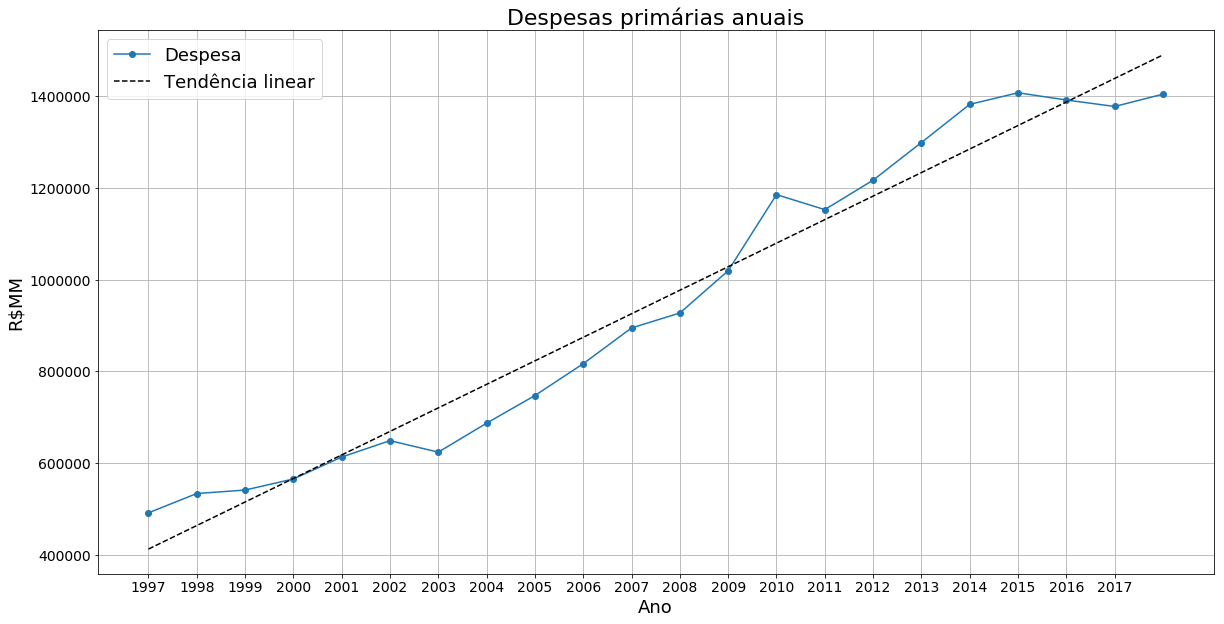

In [93]:
# Fit linear nas despesas
x = np.array(range(len(dados_ano.Ano)))
b, a = np.polyfit(x, dados_ano.Despesa, deg = 1)
lintrend = a + b*x

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.Ano, dados_ano.Despesa, 'o-', label = 'Despesa')
plt.plot(dados_ano.Ano, lintrend, '--', label = 'Tendência linear', color = 'black')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Despesas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

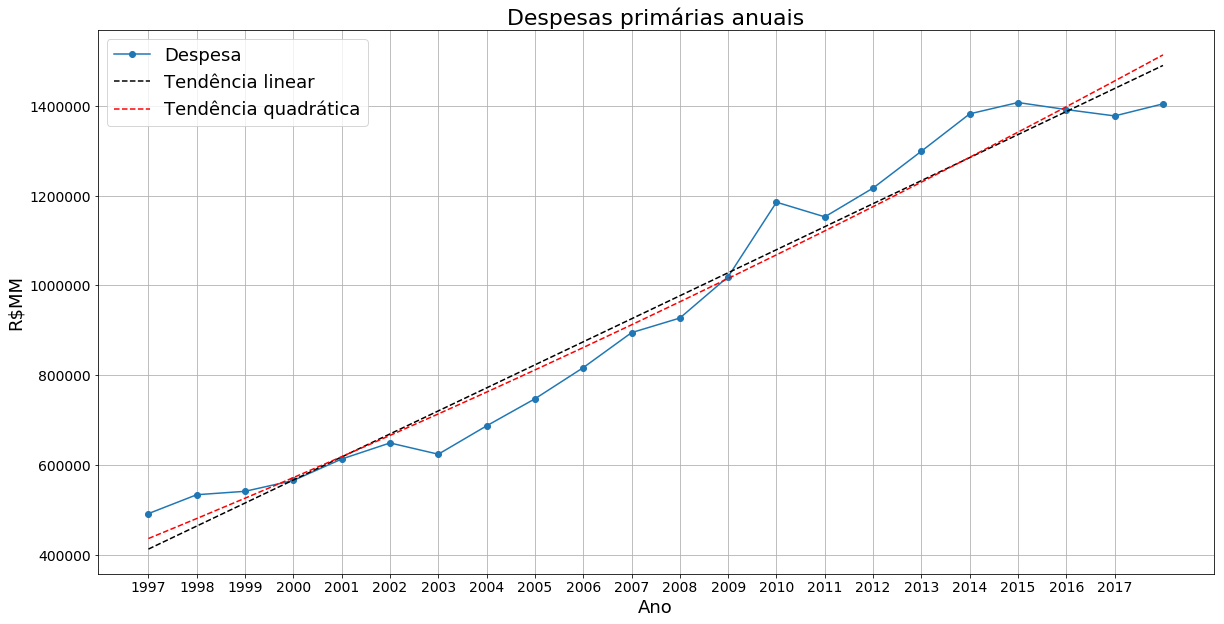

In [94]:
# Fit quadrático nas despesas
c, b, a = np.polyfit(x, dados_ano.Despesa, deg = 2)
quadtrend = a + b*x + c*x**2

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.Ano, dados_ano.Despesa, 'o-', label = 'Despesa')
plt.plot(dados_ano.Ano, lintrend, '--', label = 'Tendência linear', color = 'black')
plt.plot(dados_ano.Ano, quadtrend, '--', label = 'Tendência quadrática', color = 'red')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Despesas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

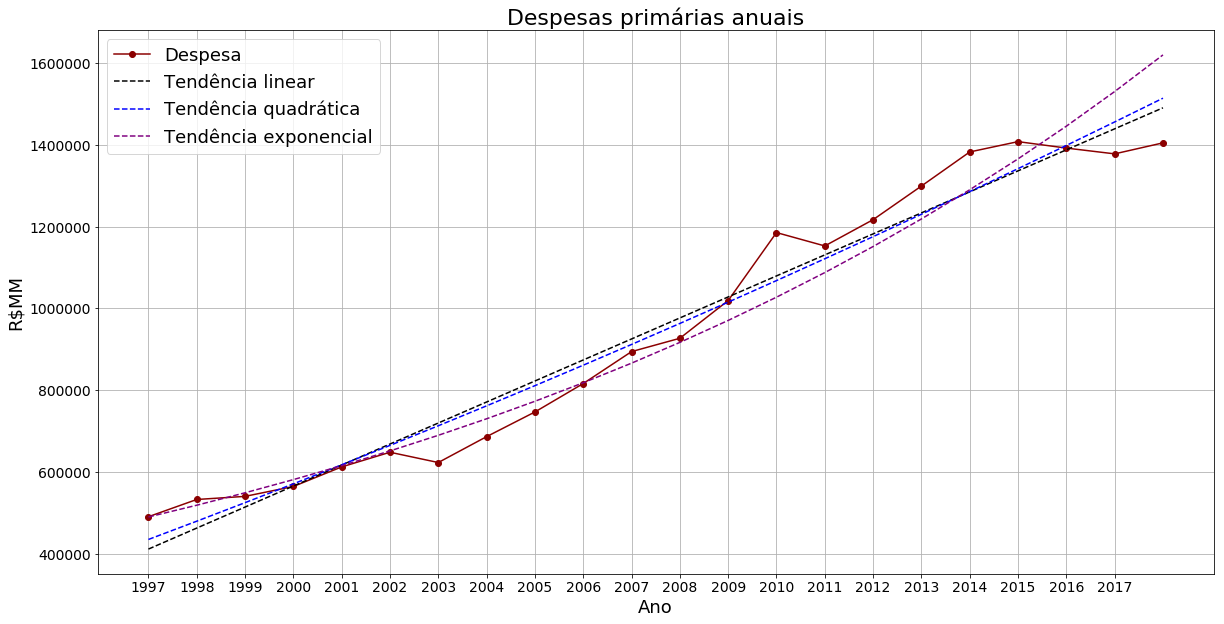

In [123]:
# Fit exponencial nas despesas
x = np.array(range(len(dados_ano.Ano)))
b, a = np.polyfit(x, np.log(dados_ano.Despesa), deg = 1)
exptrend = np.exp(a + b*x)

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.Ano, dados_ano.Despesa, 'o-', label = 'Despesa', color = 'darkred')
plt.plot(dados_ano.Ano, lintrend, '--', label = 'Tendência linear', color = 'black')
plt.plot(dados_ano.Ano, quadtrend, '--', label = 'Tendência quadrática', color = 'blue')
plt.plot(dados_ano.Ano, exptrend, '--', label = 'Tendência exponencial', color = 'purple')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Despesas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

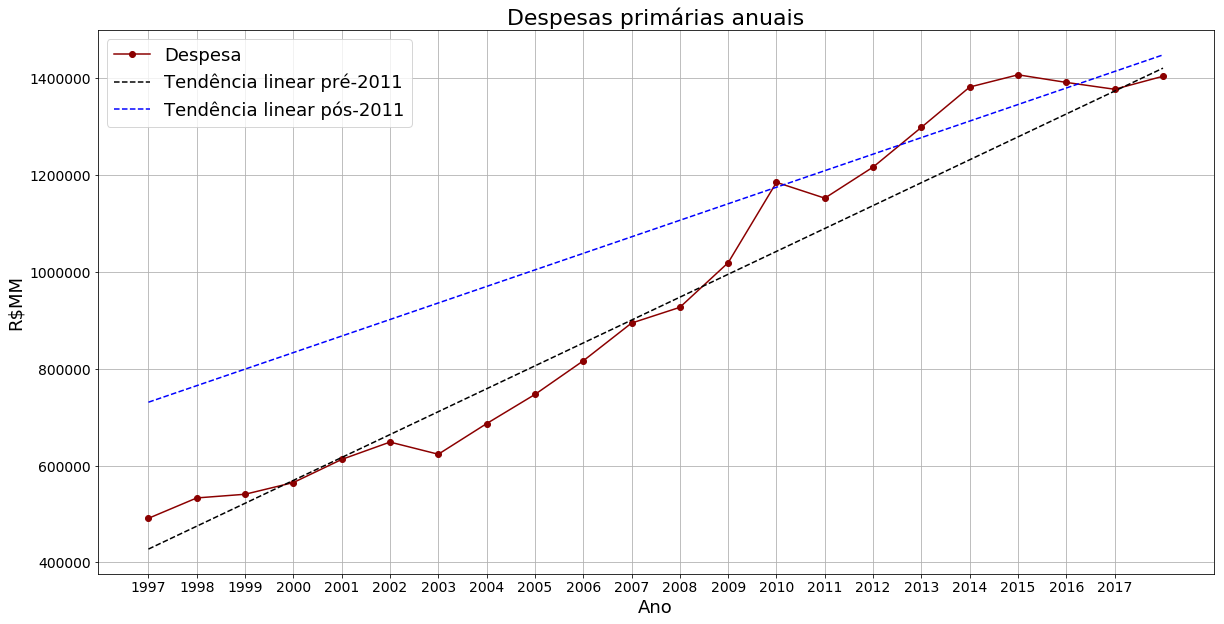

In [124]:
# Comparando tendências lineares pré 2011 x pós 2011 (inclusive)
x = np.array(range(len(dados_ano.Ano)))
y1 = dados_ano.loc[dados_ano.Ano < 2011, 'Despesa']
n = len(y1)
b, a = np.polyfit(x[:n], y1, deg = 1)
lintrend1 = a + b*x

y2 = dados_ano.loc[dados_ano.Ano >= 2011, 'Despesa']
b, a = np.polyfit(x[n:], y2, deg = 1)
lintrend2 = a + b*x

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.Ano, dados_ano.Despesa, 'o-', label = 'Despesa', color = 'darkred')
plt.plot(dados_ano.Ano, lintrend1, '--', label = 'Tendência linear pré-2011', color = 'black')
plt.plot(dados_ano.Ano, lintrend2, '--', label = 'Tendência linear pós-2011', color = 'blue')

plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Despesas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

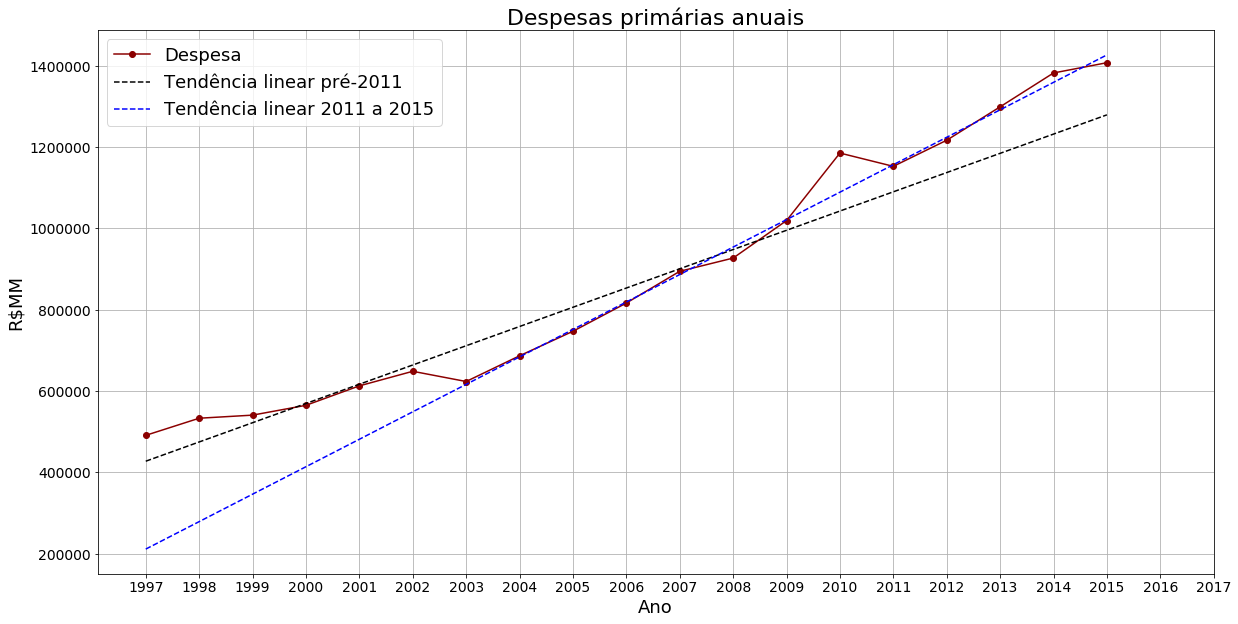

In [125]:
# Comparando tendências lineares pré 2011 x pós 2011 (inclusive), descartando dados após 2015
x = np.array(range(len(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'])))

y1 = dados_ano.loc[(dados_ano.Ano < 2011) & (dados_ano.Ano <= 2015), 'Despesa']
n = len(y1)
b, a = np.polyfit(x[:n], y1, deg = 1)
lintrend1 = a + b*x

n2 = len(dados_ano[(dados_ano.Ano >= 2011) & (dados_ano.Ano <= 2015)])
y2 = dados_ano.loc[(dados_ano.Ano >= 2011) & (dados_ano.Ano <= 2015), 'Despesa']
b, a = np.polyfit(x[n:], y2, deg = 1)
lintrend2 = a + b*x

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], dados_ano.loc[dados_ano.Ano <=2015, 'Despesa'], 'o-', label = 'Despesa', color = 'darkred')
plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], lintrend1, '--', label = 'Tendência linear pré-2011', color = 'black')
plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], lintrend2, '--', label = 'Tendência linear 2011 a 2015', color = 'blue')

plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Despesas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

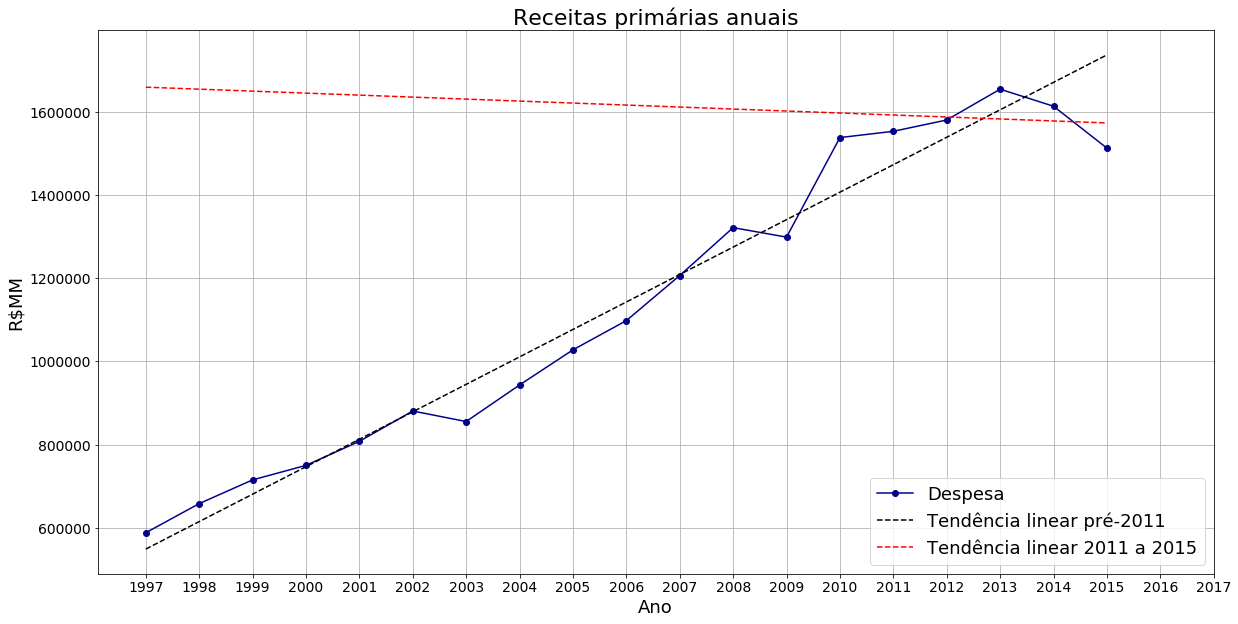

In [126]:
# Receita
# Comparando tendências lineares pré 2011 x pós 2011 (inclusive), descartando dados após 2015
x = np.array(range(len(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'])))

y1 = dados_ano.loc[(dados_ano.Ano < 2011) & (dados_ano.Ano <= 2015), 'Receita']
n = len(y1)
b, a = np.polyfit(x[:n], y1, deg = 1)
lintrend1 = a + b*x

n2 = len(dados_ano[(dados_ano.Ano >= 2011) & (dados_ano.Ano <= 2015)])
y2 = dados_ano.loc[(dados_ano.Ano >= 2011) & (dados_ano.Ano <= 2015), 'Receita']
b, a = np.polyfit(x[n:], y2, deg = 1)
lintrend2 = a + b*x

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], dados_ano.loc[dados_ano.Ano <=2015, 'Receita'], 'o-', label = 'Despesa', color = 'darkblue')
plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], lintrend1, '--', label = 'Tendência linear pré-2011', color = 'black')
plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], lintrend2, '--', label = 'Tendência linear 2011 a 2015', color = 'red')

plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Receitas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)